# Polynomial Regression

This linear equation can be used to represent a linear relationship. But, in polynomial regression, we have a polynomial equation of degree n represented as:

polynomial regression equation

![alt text](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/03/pr3-300x24.png)

Here:

  𝜃0 is the bias,

  𝜃1, 𝜃2, …, 𝜃n are the weights in the equation of the polynomial regression,

 and n is the degree of the polynomial

This is still considered to be linear model as the coefficients/weights associated with the features are still linear. x² is only a feature. However the curve that we are fitting is quadratic in nature.



"In Polynomial regression, the original features are converted into Polynomial features of required degree (2,3,..,n) and then modeled using a linear model."

## Importing the libraries

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [0]:
dataset = pd.read_csv('https://raw.githubusercontent.com/Uttam580/Machine_learning/master/datasets./Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [59]:
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [60]:
X,y

(array([[ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10]]),
 array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
         300000,  500000, 1000000]))

## Training the Linear Regression model on the whole dataset

In [61]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
lin_reg.coef_

array([80878.78787879])

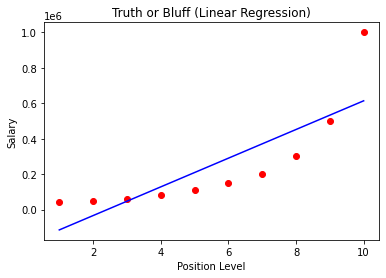

In [63]:
#visualizing data on linear regression
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

To overcome under-fitting, we need to increase the complexity of the model.

## Training the Polynomial Regression model on the whole dataset

To convert the original features into their higher order terms we will use the PolynomialFeatures class provided by scikit-learn. Next, we train the model using Linear Regression

In [0]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg2= PolynomialFeatures(degree = 2)
X_poly2 = poly_reg2.fit_transform(X)

In [65]:
X_poly2[1:3]

array([[1., 2., 4.],
       [1., 3., 9.]])

In [66]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly2, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [67]:
print(lin_reg_2.coef_)

[      0.         -132871.21212121   19431.81818182]


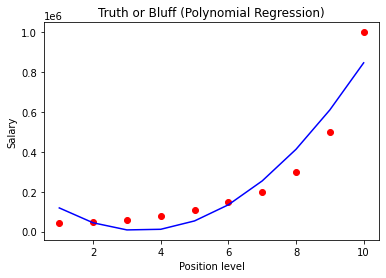

In [68]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg2.fit_transform(X)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

**Higher order Polynomial** 

In [69]:
poly_reg3= PolynomialFeatures(degree = 3)
X_poly3 = poly_reg3.fit_transform(X)
lin_reg_3 = LinearRegression()
lin_reg_3.fit(X_poly3, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [70]:
lin_reg_3.predict(poly_reg3.fit_transform(X))

array([ 14902.0979021 ,  78759.9067599 ,  94960.37296037,  88223.77622377,
        83270.39627039, 104820.51282051, 177594.40559441, 326312.35431236,
       575694.63869464, 950461.53846154])

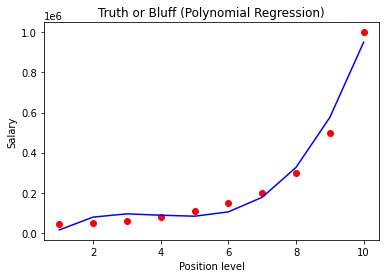

In [71]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_3.predict(poly_reg3.fit_transform(X)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

**4th order Polynominal order**

In [72]:
poly_reg4= PolynomialFeatures(degree = 4)
X_poly4 = poly_reg4.fit_transform(X)
lin_reg_4 = LinearRegression()
lin_reg_4.fit(X_poly4, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

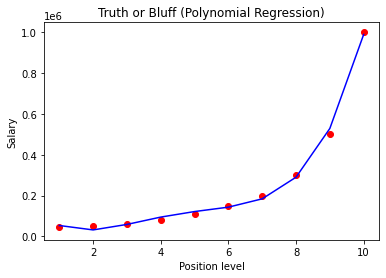

In [73]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_4.predict(poly_reg4.fit_transform(X)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

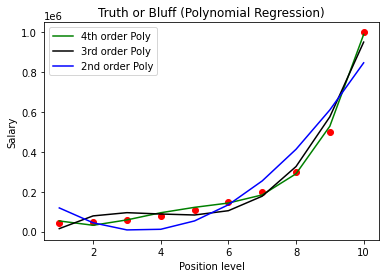

In [74]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_4.predict(poly_reg4.fit_transform(X)), color = 'g')
plt.plot(X, lin_reg_3.predict(poly_reg3.fit_transform(X)),color = 'k')
plt.plot(X, lin_reg_2.predict(poly_reg2.fit_transform(X)), color = 'b')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.legend(('4th order Poly','3rd order Poly','2nd order Poly'))
plt.show()


**Prediction on differnt different model**

In [75]:
lin_reg.predict([[6.5]])

array([330378.78787879])

In [76]:
lin_reg_2.predict(poly_reg2.fit_transform([[6.5]]))

array([189498.10606061])

In [77]:
lin_reg_3.predict(poly_reg3.fit_transform([[6.5]]))

array([133259.46969697])

In [78]:
lin_reg_4.predict(poly_reg4.fit_transform([[6.5]]))

array([158862.45265155])

**The Bias vs Variance trade-off**

Bias refers to the error due to the model’s simplistic assumptions in fitting the data. A high bias means that the model is unable to capture the patterns in the data and this results in under-fitting.


Variance refers to the error due to the complex model trying to fit the data. High variance means the model passes through most of the data points and it results in over-fitting the data.
The below picture summarizes our learning.

![alt text](https://miro.medium.com/max/1400/1*zOl_ztYqnzyWRkBffeOsRQ.png)

we can observe that as the model complexity increases, the bias decreases and the variance increases and vice-versa. Ideally, a machine learning model should have low variance and low bias. But practically it’s impossible to have both. Therefore to achieve a good model that performs well both on the train and unseen data, a trade-off is made.

![alt text](https://miro.medium.com/max/984/1*kADA5Q4al9DRLoXck6_6Xw.png)